关键思想：要构建一棵完美的树，你需要在信息量最大的特征处拆分树，从而得到最纯的子节点
criterion='gini'：基尼不纯度是一种误分类的度量，目标是最小化误分类的概率。数据的完美拆分（每个子组包含一个目标标签的数据点）产生的基尼系数为0。我们可以度量树的每种可能拆分的基尼系数，然后选择基尼不纯度最低的那个。它常用于分类和回归树.
criterion='entropy'（也称为信息增益）：在信息论中，熵是与信号或者分布相关的不确定量的度量。一个完美的数据拆分熵为0。我们可以度量树的每种可能拆分的熵，然后选择熵最低的那个.

关于决策树：
优点
    天然的可解释性。 这是决策树最大的优点了,常用于医学等需要可解释性强的分类器
    可以处理缺失值（missing）， 字符型（nominal）， 数值型（numeric）等数据类型。
    非参数模型（non-parametric）。 没有复杂的参数设置，谁跑效果都相对一样。
    运算速度相对比较快.

缺点
    最大的缺点就是很容易过拟合。 导致实际预测的效果并不高。
    不适合处理高维数据， 当属性数量过大的时候,决策树相当复杂
    对异常值（Outlier）过于敏感， 很容易导致树的结构的巨大的变换。
    泛化（Generalization）能力太差， 对于没有出现过的值几乎没有办法分类,鲁棒性差


控制决策树的复杂度
你继续生成一棵树，直到所有的叶子节点都是纯的，那么通常你会得到一棵过于复杂且无法解释的树
纯叶子节点的出现意味着这棵树是100%正确的,也就是过拟合le


决策树避免过拟合有两种常见的方法：
    1.先减枝,也就是提前停止树的创建过程
    2.后减枝,也就是树形成后再删除或者折叠包含少量信息的节点


1.先减枝：DecisionTreeclassifier
    传入参数.
    1.max_depth 限制树的最大深度
    2.max_leaf_nodes 限制叶子节点的最大数量
    3.min_samples_splits 继续拆分节点所需要的节点中最少点数

项目实战：使用决策树诊断乳腺癌
    乳腺癌Wisconsin数据集
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ (Diagnostic)
    sklearn 中 load_breast_cancer

In [78]:
'''初始化与数据集加载'''
from sklearn import datasets
from sklearn import  tree
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt

# breast_cancer.data.shape #(569, 30)  569张图的30个特征
# breast_cancer.feature_names.shape #(30,) 30个特征
breast_cancer= datasets.load_breast_cancer()
feature_names = breast_cancer.feature_names
target,Data = breast_cancer.target,breast_cancer.data
target_names = breast_cancer.target_names
dir(breast_cancer)


['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [79]:
xTrain,xTest,yTrain,yTest = sklearn.model_selection.train_test_split(Data,target,test_size=0.1,random_state=7)
cancer_dtree = tree.DecisionTreeClassifier()
cancer_dtree.fit(xTrain,yTrain)

with open('Dot/cancer_dtree1.dot','w') as f:
    tree.export_graphviz(cancer_dtree,f,feature_names = feature_names,class_names = target_names)



这棵树的特征分布不平衡,balance tree,左子树深度为7,右子树为5

目前问题如下：
    非对称树意味着什么？
    树的深度可能导致过拟合,对于两个相同性能的树,我们偏向于depth小的
    决策树只不过是在不同的特征上执行一组分层逻辑运算，以产生一个预测

In [80]:
print(cancer_dtree.score(xTest,yTest))

0.9298245614035088


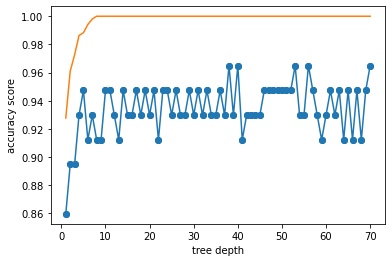

In [81]:
'''探索  树的深度  对于性能的影响'''
max_depths = np.arange(1,71,1)
train_score = []
test_score = []
for index,data in enumerate(max_depths):
    dtree = tree.DecisionTreeClassifier(max_depth=data)
    dtree.fit(xTrain,yTrain)
    train_score.append(dtree.score(xTrain,yTrain))
    test_score.append(dtree.score(xTest,yTest))
plt.plot(max_depths,test_score,'o-',label ='test' )
plt.plot(max_depths,train_score,label ='train' )
plt.scatter(max_depths,test_score)
plt.xlabel('tree depth')
plt.ylabel('accuracy score')
plt.show()

从结果上看似乎树越深,模型的效果越好
但是,树的深度可能导致过拟合,对于两个相同性能的树,我们偏向于depth小的
depth 取 17

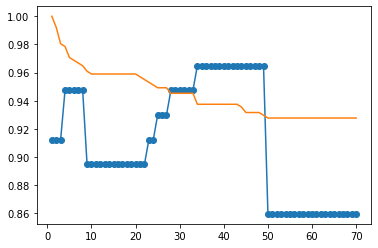

In [91]:
'''探索 限制叶子节点的容量最小值  对性能的影响'''
min_samples = np.arange(1,71,1) #min_samples_leaf
train_score1 = []
test_score1 = []
for index,data in enumerate(min_samples):
    dtree = tree.DecisionTreeClassifier(min_samples_leaf = data)
    dtree.fit(xTrain,yTrain)
    train_score1.append(dtree.score(xTrain,yTrain))
    test_score1.append(dtree.score(xTest,yTest))
plt.plot(min_samples,test_score1,label ='test' )
plt.plot(min_samples,train_score1,label ='train' )
plt.scatter(min_samples,test_score1)
plt.show()

从上图中我们可以看到,min_samples_leaf限制在 40左右会有最优值

In [92]:
'''得出我们的最优参数模型
max_depth = 17
min_samples_leaf = 40'''
dtree = tree.DecisionTreeClassifier(min_samples_leaf=40,max_depth=17)
dtree.fit(xTrain,yTrain)
dtree.score(xTest,yTest)

0.9649122807017544